## Taller 4

### Juan Daniel Torres Amézquita (201414896)

#### Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT

In [1]:
%pylab inline
import scipy as sp
import mpmath as mp
from mpl_toolkits.mplot3d import axes3d
import scipy.io.wavfile as waves
import IPython.display as ipd

In [2]:
L = 20
n = 128
x2 = linspace(-L/2,L/2,n+1)
x = x2[0:n]
fmodes = linspace(-n/2,n/2,n)

In [3]:
u = np.exp(-x*x)
ut = np.fft.fft(u)
utshift = fft.fftshift(ut)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


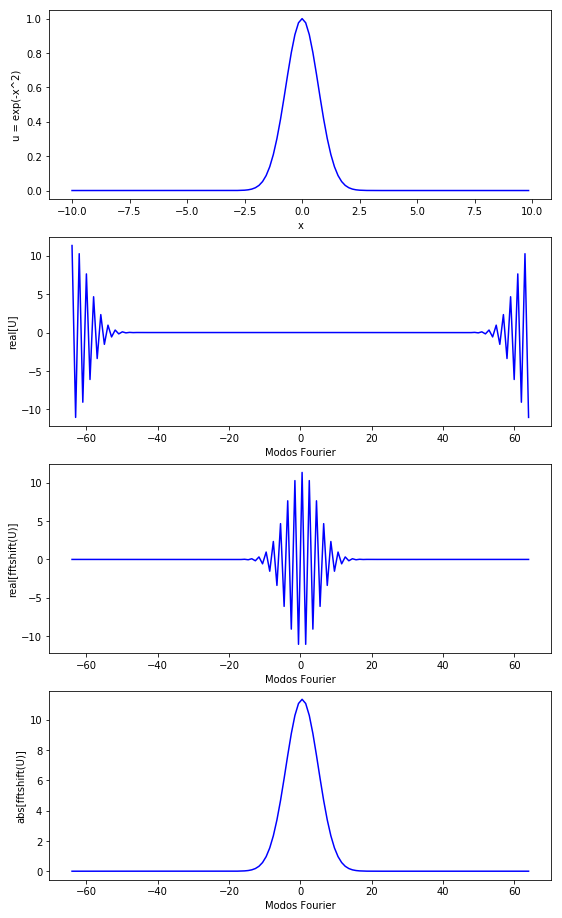

In [4]:
figure(figsize=(9,16))
subplot(4,1,1)
pylab.xlabel("x")
pylab.ylabel("u = exp(-x^2)")
pylab.plot(x,u,'-b')

subplot(4,1,2)
pylab.xlabel("Modos Fourier")
pylab.ylabel("real[U]")
pylab.plot(fmodes,ut,'-b')

subplot(4,1,3)
pylab.xlabel("Modos Fourier")
pylab.ylabel("real[fftshift(U)]")
pylab.plot(fmodes,utshift,'-b')

subplot(4,1,4)
pylab.xlabel("Modos Fourier")
pylab.ylabel("abs[fftshift(U)]")
pylab.plot(fmodes,np.abs(utshift),'-b')

#### FFT versus Finite-Difference Differentiation

In [5]:
L = 20
n = 128

In [6]:
x2 = linspace(-L/2,L/2,n+1)
x = x2[0:n]
dx = x[1]-x[0]
u = 1/np.cosh(x)
ut = np.fft.fft(u)
k1 = linspace(0,(n/2-1),64)
k2 = linspace((-n/2),-1,64)
kcat = np.concatenate((k1,k2))
k = (2*np.pi/L)*kcat

In [7]:
ut1 = 1j*k*ut
ut2 = -k*k*ut
u1 = np.real(np.fft.ifft(ut1))
u2 = np.real(np.fft.ifft(ut2))
u1exact = -(1/np.cosh(x))*(np.tanh(x))
u2exact = (1/np.cosh(x))-2*(1/np.cosh(x))**3

In [8]:
ux = linspace(0,n,n)
ux[0] = (-3*u[0]+1*u[1]-u[2])/(2*dx) 
for s in range(1,(n-1)):
    ux[s] = (u[s+1]-u[s-1])/(2*dx)
ux[n-1] = (3*u[1]-4*u[2]+u[3])/(2*dx) 

In [9]:
ux2 = linspace(0,n,n)
ux2[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1] = (-3*u[1]+4*u[2]-u[3])/(2*dx)
for s in range(2,(n-2)):
    ux2[s] = (-u[s+2]+8*u[s+1]-8*u[s-1]+u[s-2])/(12*dx)
ux2[-2] = (3*u[-2]-4*u[-3]+u[-4])/(2*dx)
ux2[-1] = (3*u[-1]-4*u[-2]+u[-3])/(2*dx)

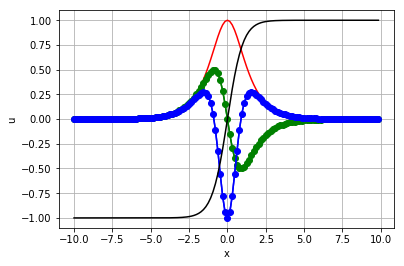

In [10]:
pylab.xlabel("x")
pylab.ylabel("u")
pylab.plot(x,u,'-r')
pylab.plot(x,u1,'-g')
pylab.plot(x,u1exact,'-go')
pylab.plot(x,u2,'-b')
pylab.plot(x,u2exact,'-bo')
pylab.plot(x,np.tanh(x),'-k')
grid()

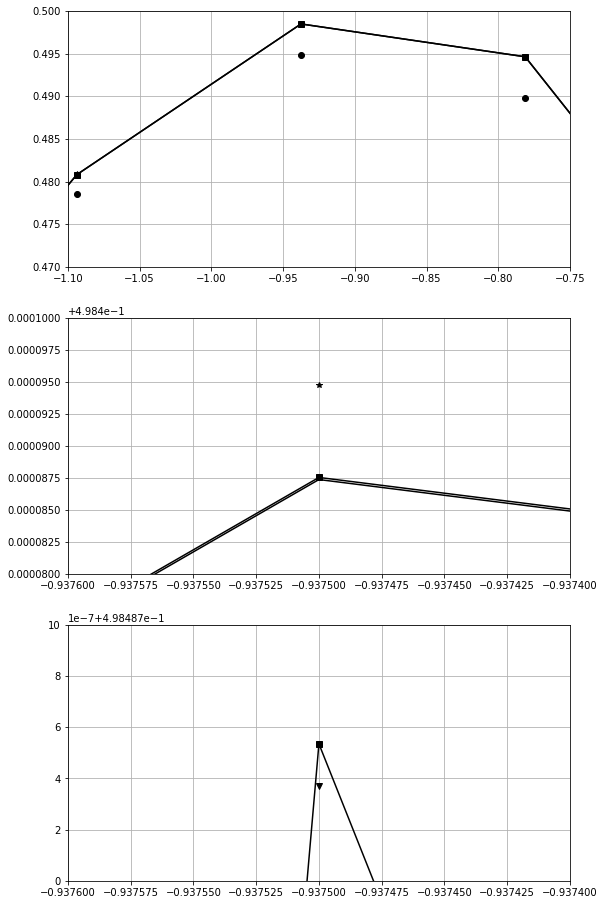

In [11]:
figure(figsize=(9,16))
subplot(3,1,1)
plot(x,u1exact,'ks-')
plot(x,u1,'k')
plot(x,ux,'ko')
plot(x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-1.1,-0.75])
axes.set_ylim([0.47,0.5])
grid()

subplot(3,1,2)
plot(x,u1exact,'ks-')
plot(x,u1,'k')
plot(x,ux,'ko')
plot(x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-0.9376,-0.9374])
axes.set_ylim([0.49848,0.49850])
grid()

subplot(3,1,3)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
plot(x,ux2,'k*')
axes = plt.gca()
axes.set_xlim([-0.9376,-0.9374])
axes.set_ylim([0.498487,0.498488])
grid()

#### FFT Application: Radar Detection and Filtering

In [12]:
L = 30
n = 512
t2 = linspace(-L,L,n+1)
t = t2[0:n]
k1 = linspace(0,(n/2-1),n/2)
k2 = linspace((-n/2),-1,n/2)
kcat = np.concatenate((k1,k2))
k = (2*np.pi/(2*L))*kcat
u = (1/np.cosh(t))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [13]:
noise = 1
ut = np.fft.fft(u)
utn = ut+noise*(np.random.randn(1,n))+1j*(np.random.randn(1,n))
un = np.fft.ifft(utn)

In [14]:
noise = 5
ut2 = np.fft.fft(u)
utn2 = ut2+noise*(np.random.randn(1,n))+1j*(np.random.randn(1,n))
un2 = np.fft.ifft(utn2)

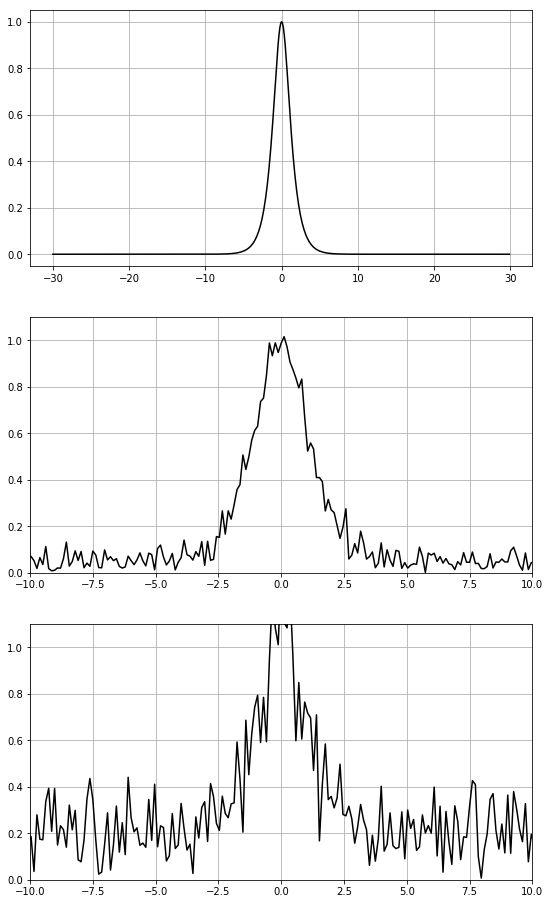

In [15]:
figure(figsize=(9,16))

subplot(3,1,1)
plot(t,u,'k')
grid()

subplot(3,1,2)
plot(t,np.abs(un)[0,:],'k')
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
grid()

subplot(3,1,3)
plot(t,np.abs(un2)[0,:],'k')
axes = plt.gca()
axes.set_xlim([-10,10])
axes.set_ylim([0,1.1])
grid()

In [16]:
noise = 10
ut = np.fft.fft(u)
unt = ut+noise*(np.random.randn(1,n))+1j*(np.random.randn(1,n))
un = np.fft.ifft(unt)

Text(0,0.5,'|ut|/max(|ut|)')

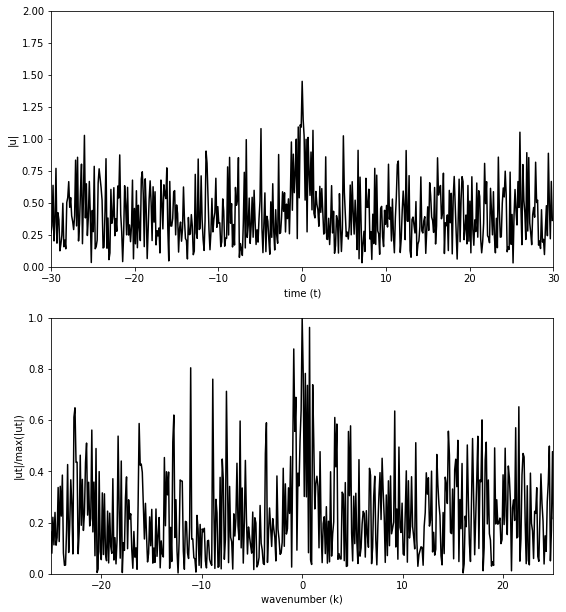

In [17]:
figure(figsize=(9,16))
subplot(3,1,1)
plot(t,abs(un)[0,:],'k')
axes = plt.gca()
axes.set_xlim([-30,30])
axes.set_ylim([0,2])
pylab.xlabel("time (t)")
pylab.ylabel("|u|")

subplot(3,1,2)
plot(fft.fftshift(k),(abs(fft.fftshift(unt)[0,:])/amax(abs(fft.fftshift(unt)[0,:]))),'k')
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")

In [18]:
filter = exp(-0.2*k**2)
unft = filter*unt
unf = np.fft.ifft(unft)

Text(0,0.5,'|u|')

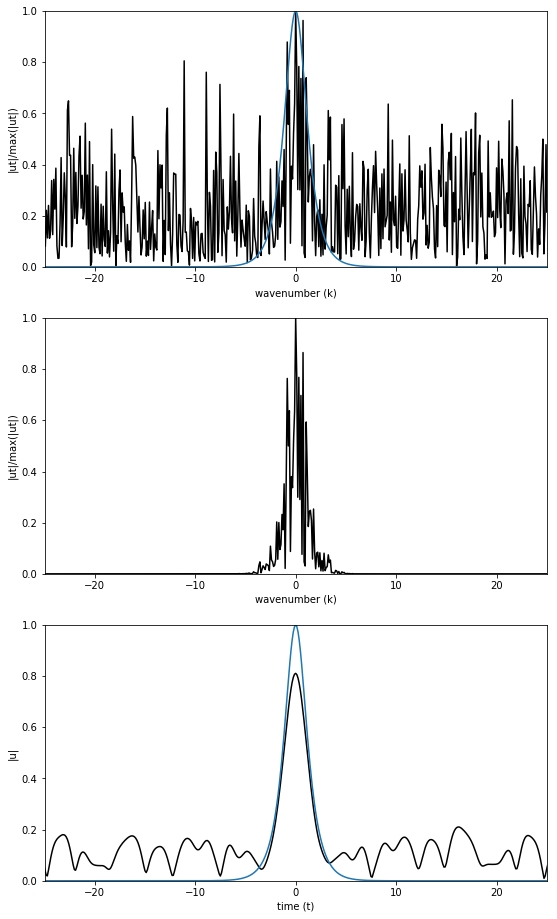

In [19]:
figure(figsize=(9,16))
subplot(3,1,1)
plot(fft.fftshift(k),(abs(fft.fftshift(unt)[0,:])/amax(abs(fft.fftshift(unt)[0,:]))),'k')
plot(t,u)
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")

subplot(3,1,2)
plot(fft.fftshift(k),(abs(fft.fftshift(unft)[0,:])/amax(abs(fft.fftshift(unft)[0,:]))),'k')
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")

subplot(3,1,3)
plot(t,(abs(unf)[0,:]),'k')
plot(t,u)
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("time (t)")
pylab.ylabel("|u|")

In [20]:
filter = exp(-0.2*(k-15)**2)
unft = filter*unt
unf = np.fft.ifft(unft)

Text(0,0.5,'|u|')

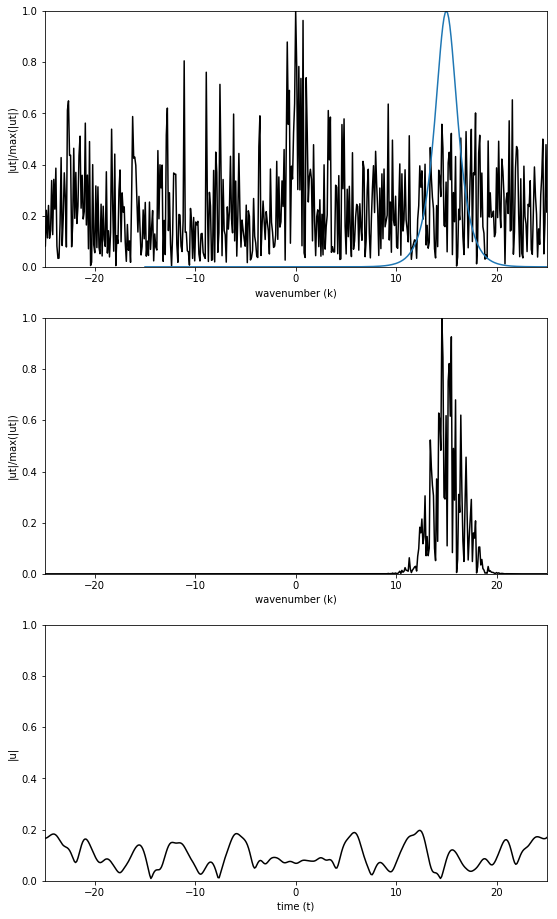

In [21]:
figure(figsize=(9,16))
subplot(3,1,1)
plot(fft.fftshift(k),(abs(fft.fftshift(unt)[0,:])/amax(abs(fft.fftshift(unt)[0,:]))),'k')
plot(t+15,u)
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")

subplot(3,1,2)
plot(fft.fftshift(k),(abs(fft.fftshift(unft)[0,:])/amax(abs(fft.fftshift(unft)[0,:]))),'k')
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("wavenumber (k)")
pylab.ylabel("|ut|/max(|ut|)")

subplot(3,1,3)
plot(t,(abs(unf)[0,:]),'k')
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([0,1])
pylab.xlabel("time (t)")
pylab.ylabel("|u|")

#### FFT Application: Radar Detection and Averaging

In [22]:
L = 30
n = 512
t2 = linspace(-L,L,n+1)
t = t2[0:n]
k1 = linspace(0,(n/2-1),n/2)
k2 = linspace((-n/2),-1,n/2)
kcat = np.concatenate((k1,k2))
k = (2*np.pi/(2*L))*kcat
ks = fft.fftshift(k)
noise = 10

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


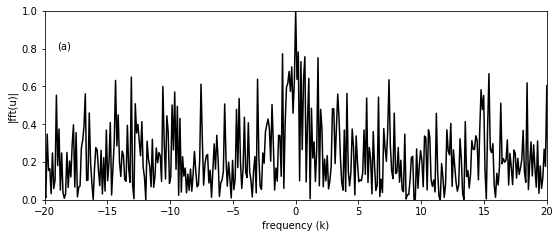

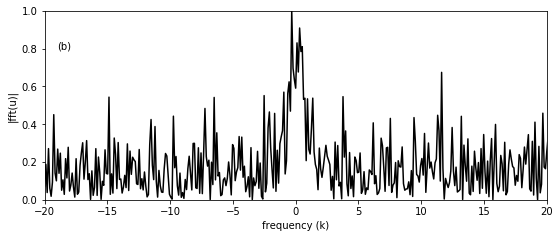

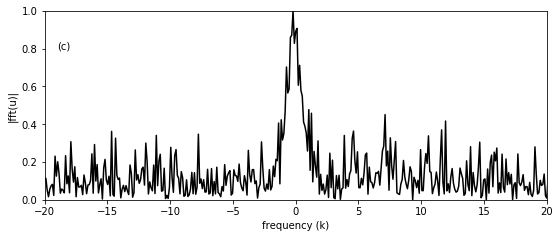

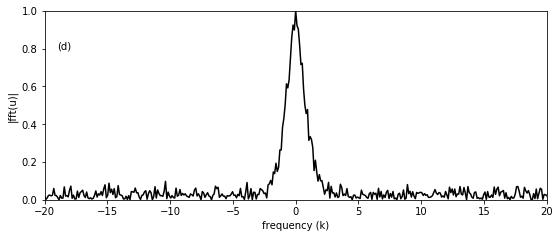

In [23]:
labels = ['(a)','(b)','(c)','(d)']
realize = [1,2,5,100]
utn = []

for jj in range(0,len(realize)):
    u = 1/cosh(t)
    ave = np.zeros((n))
    ut = fft.fft(u)
    un = []
    dat = []
    for j in range(0,realize[jj]):
        utn = np.zeros((realize[jj],512))
        dat = np.zeros((realize[jj],512))
        un = np.zeros((realize[jj],512))
        utn[j,:] = ut+noise*(np.random.randn(1,n))+1j*(np.random.randn(1,n))
        ave = ave + utn[j,:]
        dat[j,:] = abs(fft.fftshift(utn[j,:]))/amax(abs(utn[j,:]))
        un[j,:] = fft.ifft(utn[j,:])
    ave = abs(fftshift(ave))/realize[jj]
    
    figure(figsize=(9,16))
    subplot(4,1,jj+1)
    matplotlib.pyplot.annotate(labels[jj], xy=(-19,0.8))
    plot(ks,ave/amax(ave),'k')
    pylab.xlabel('frequency (k)')
    pylab.ylabel("|fft(u)|")
    axes = plt.gca()
    axes.set_xlim([-20,20])
    axes.set_ylim([0,1])
    

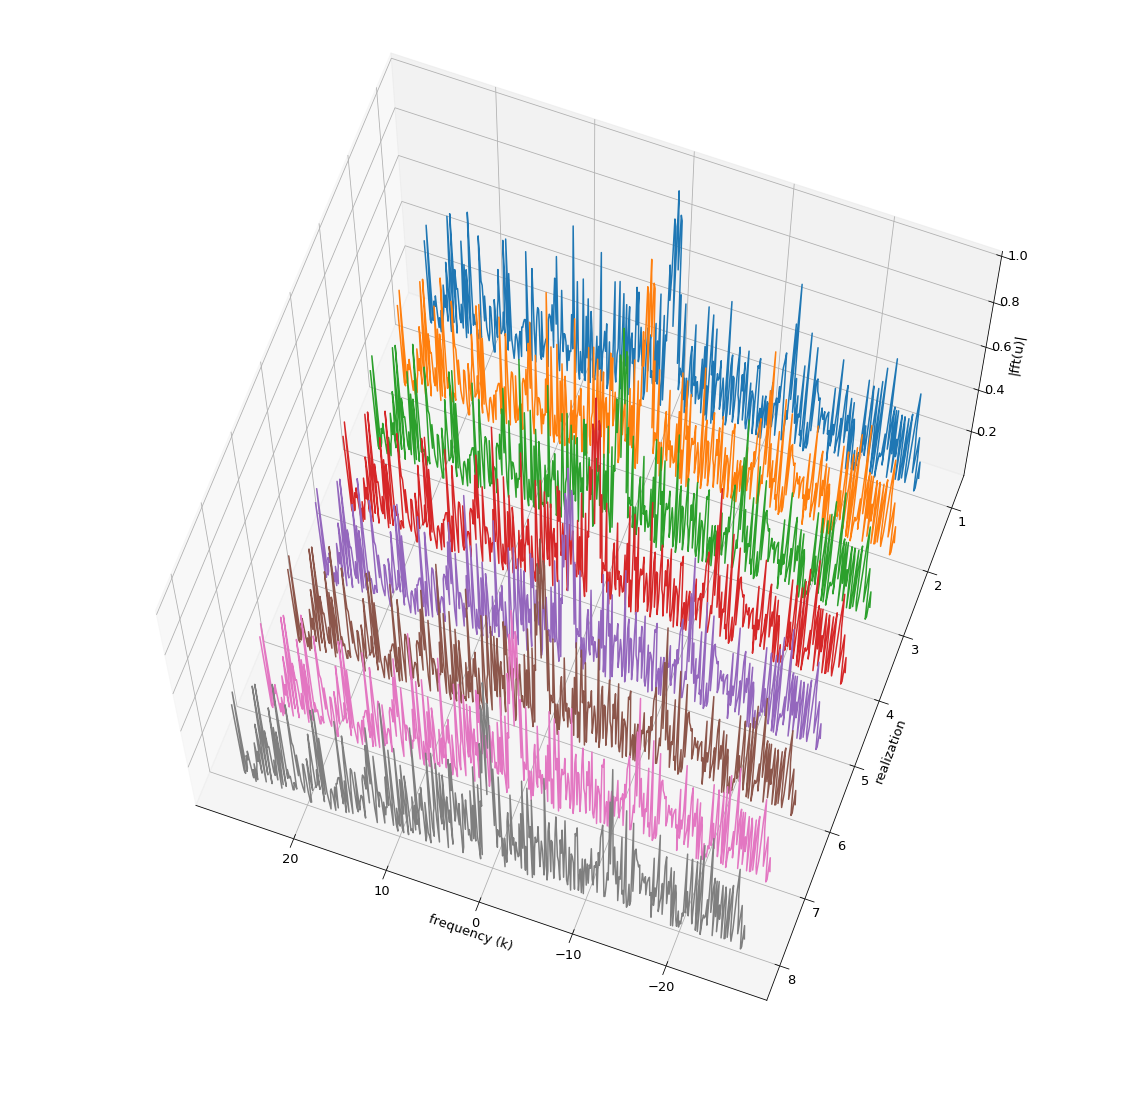

In [24]:
figure(figsize=(20,20))
matplotlib.rcParams['font.size'] = 13
ax = gca(projection='3d')
ax.set_xlabel('frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
for d in range(0,8):
    ax.plot(ks,(np.zeros(n)+(d+1)),dat[j])
ax.view_init(70,110)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


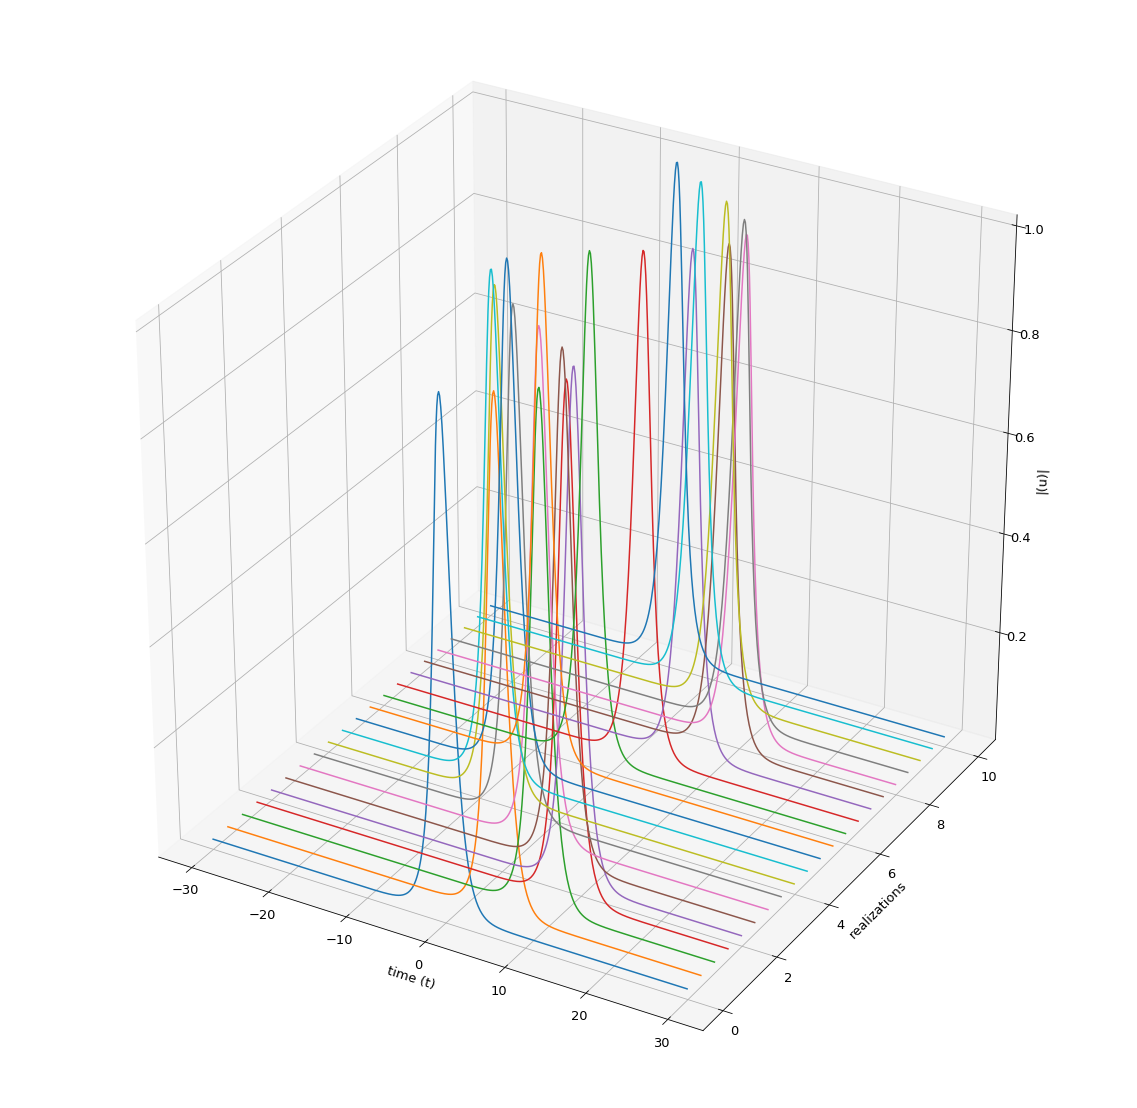

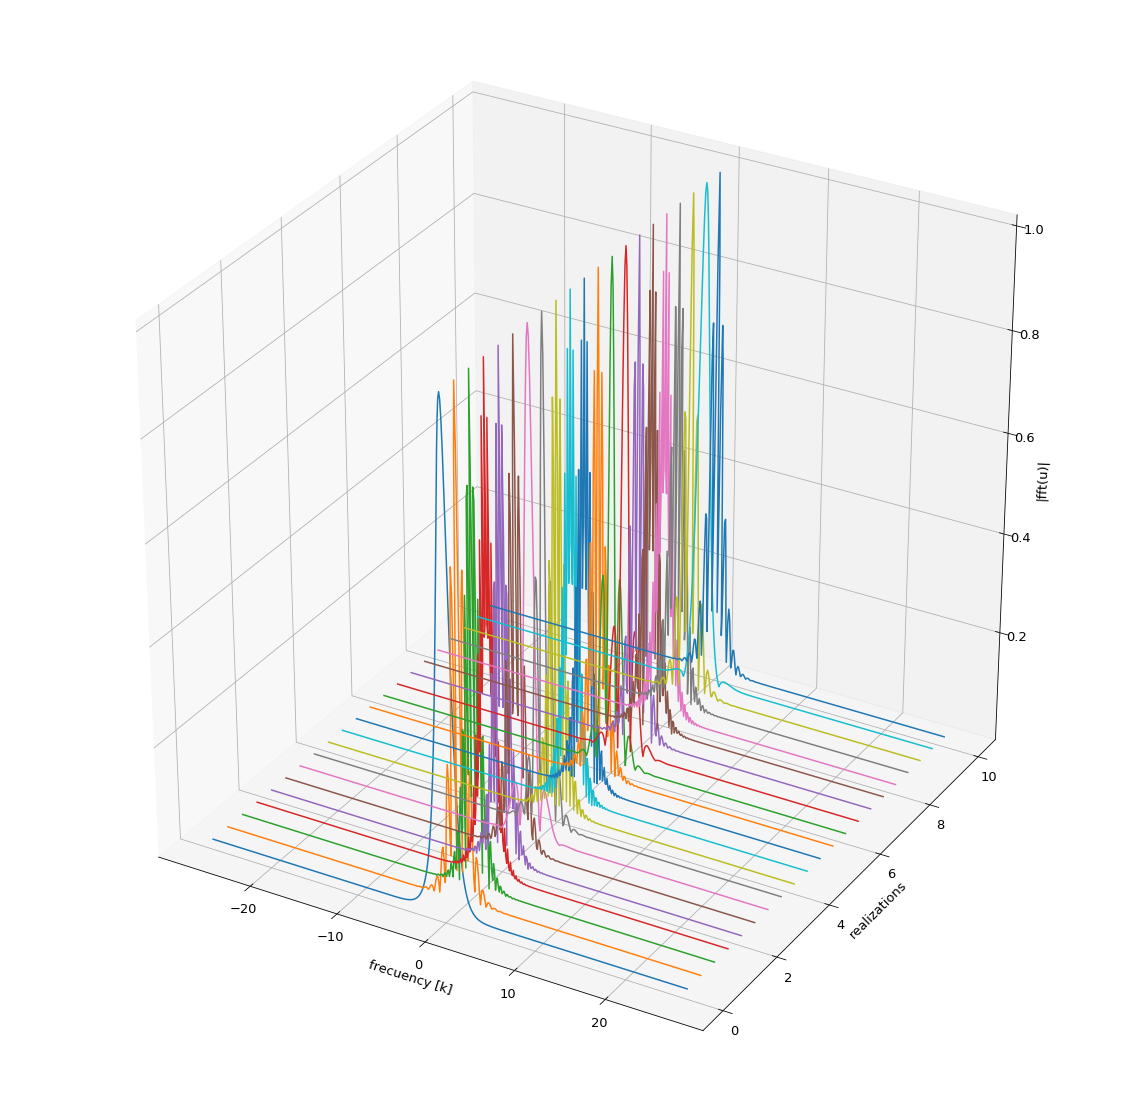

In [25]:
figure(figsize=(20,20))
matplotlib.rcParams['font.size'] = 13

ax1 = gca(projection='3d')
slice = linspace(0,10,21)
[T,S] = meshgrid(t,slice)
[K,S] = meshgrid(k,slice)
U = (1/cosh(T-10*sin(S)))*exp(1j*0*T)
ax1.set_xlabel('time (t)')
ax1.set_ylabel('realizations')
ax1.set_zlabel('|(u)|')
for f in range(0,len(slice)):
    ax1.plot(T[f],S[f],U[f])
ax.view_init(70,110)

Ut = np.zeros((21,512))
Kp = np.zeros((21,512))
Utp = np.zeros((21,512))
Utn = np.zeros((21,512))
Utnp = np.zeros((21,512))
Un = np.zeros((21,512))
for j in range(0,len(slice)):
    Ut[j,:] = fft.fft(U[j,:])
    Kp[j,:] = fft.fftshift(K[j,:])
    Utp[j,:] = fft.fftshift(Ut[j,:])
    Utn[j,:] = Ut[j,:]+noise*(np.random.randn(1,n))+1j*(np.random.randn(1,n))
    Utnp[j,:] = fft.fftshift(Utn[j,:])/amax(abs(Utn[j,:]))
    Un[j,:] = fft.ifft(Utn[j,:])

figure(figsize=(20,20))
matplotlib.rcParams['font.size'] = 13
ax2 = gca(projection='3d')   
ax2.set_xlabel('frecuency [k]')
ax2.set_ylabel('realizations')
ax2.set_zlabel('|fft(u)|')
for g in range (0,len(slice)):
    ax2.plot(Kp[g],S[g],abs(Utp[g])/max(abs(Utp[0])))

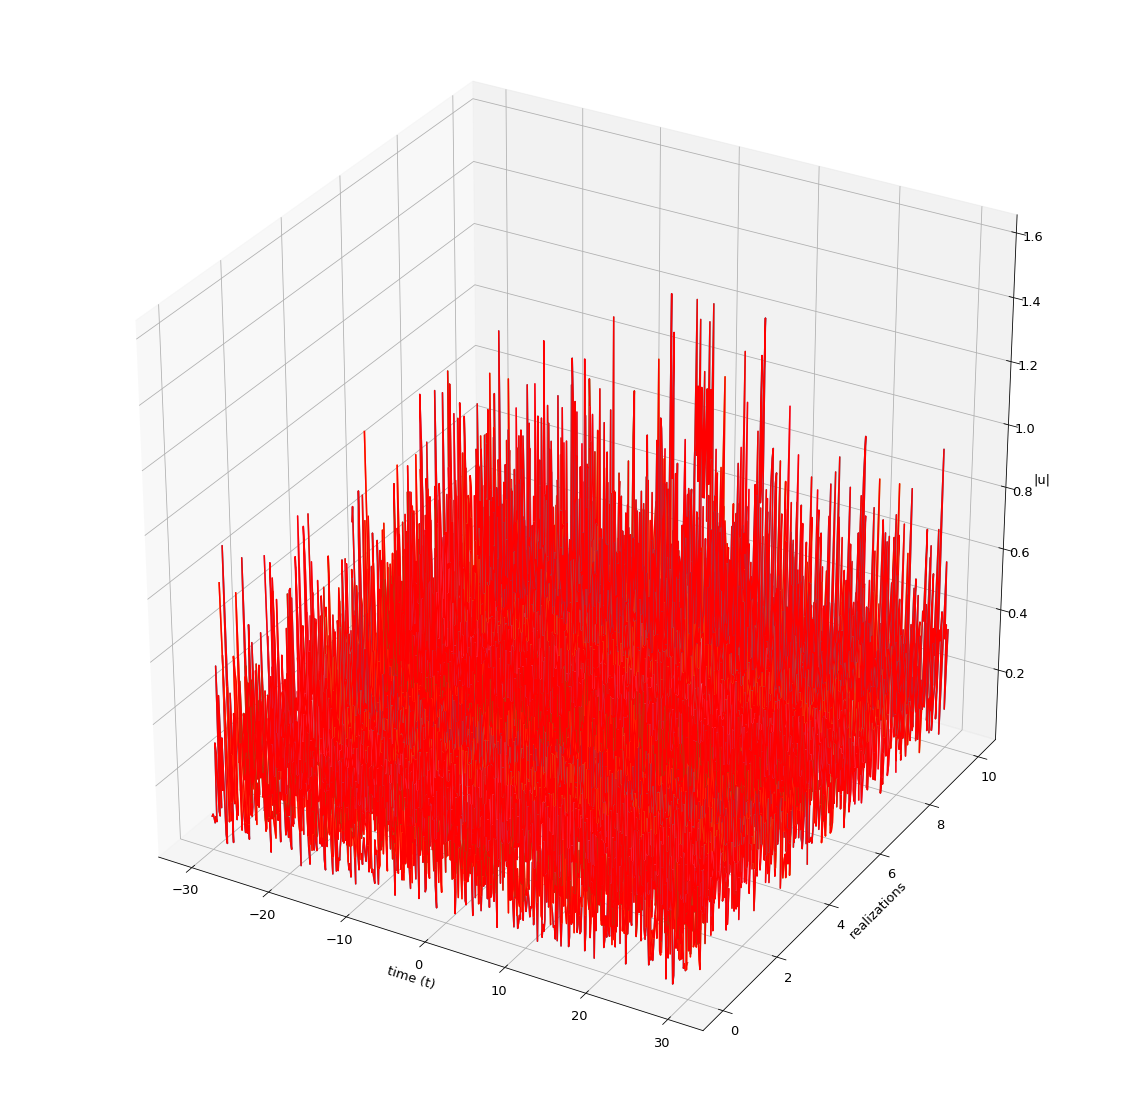

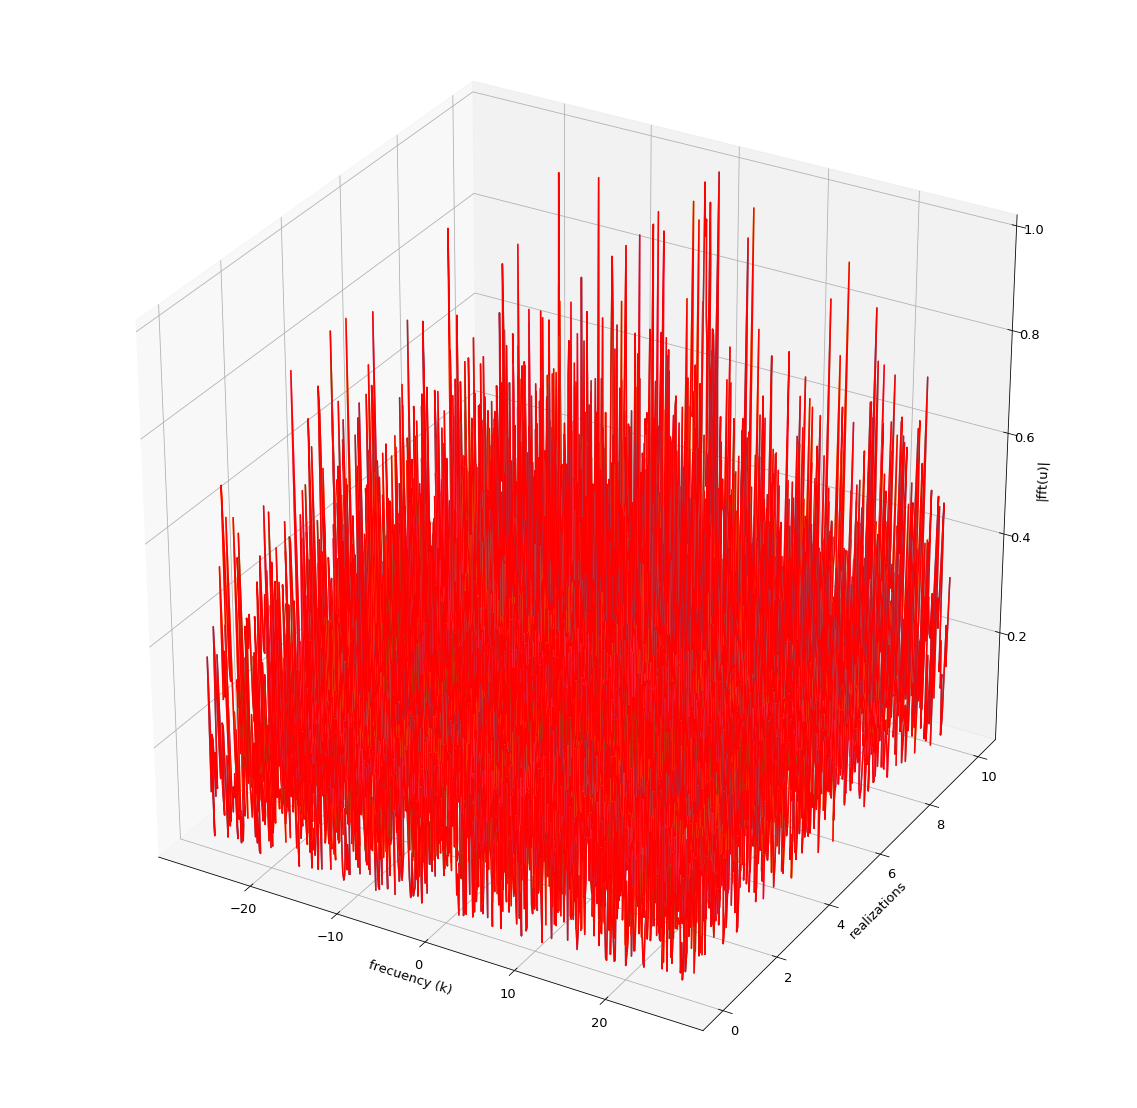

In [26]:
figure(figsize=(20,20))
matplotlib.rcParams['font.size'] = 13
ax = gca(projection='3d')
ax.set_xlabel('time (t)')
ax.set_ylabel('realizations')
ax.set_zlabel('|u|')
for g in range (0,len(slice)):
    ax.plot(T[g],S[g],abs(Un[g]))
    ax.plot(T[g],S[g],abs(Un[g]), color = 'r')

figure(figsize=(20,20))
matplotlib.rcParams['font.size'] = 13
ax2 = gca(projection='3d')
ax2.set_xlabel('frecuency (k)')
ax2.set_ylabel('realizations')
ax2.set_zlabel('|fft(u)|')
for g in range (0,len(slice)):
    ax2.plot(Kp[g],S[g],abs(Utnp[g]))
    ax2.plot(Kp[g],S[g],abs(Utnp[g]), color = 'r')

Text(0,0.5,'|fft(u)|')

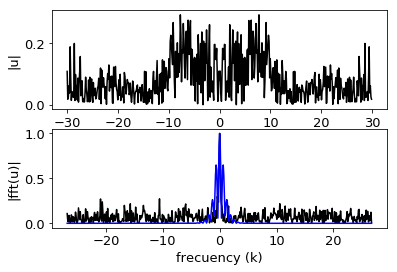

In [27]:
Uave = zeros(n)
Utave = zeros(n)
for j in range(0,len(slice)):
    Uave = Uave + Un[j,:]
    Utave = Utave + Utn[j,:]
Uave = Uave/len(slice)
Utave = fft.fftshift(Utave)/len(slice)
subplot(2,1,1)
plot(t,abs(Uave),'k')
pylab.xlabel("time (t)")
pylab.ylabel("|u|")
subplot(2,1,2)
plot(ks,abs(Utave)/amax(abs(Utave)),'k')
plot(ks,abs(fft.fftshift(Ut[1,:]))/amax(abs(Ut[1,:])),'b')
pylab.xlabel("frecuency (k)")
pylab.ylabel("|fft(u)|")

#### Ejemplo de filtrado de sonido

La mayoría de aviones modernos tienen un sistema de alerta de proximidad al suelo (GWPS, Ground Proximity Warning System). Este consiste en una alerta sonora que avisa al piloto que su curso lo está llevando peligrosamente cerca al suelo, o a una colisión con este.

En un ambiente ruidoso como lo es una cabina, es importante que sonidos como este lleguen al piloto. Por lo tanto, tenemos como ejemplo una alerta de proximidad al suelo contaminada con ruido blanco. Procedemos a usar un filtro Gaussiano como fue implementado en la sección 12.2.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


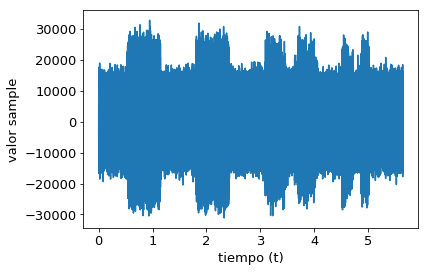

In [36]:
sound = waves.read('terrain_pull_up_gws_duro.wav','r')
n = 248990
L = 30
t = arange(n)/sound[0]
data = fromstring(sound[1], dtype=int16)
plot(t,sound[1])
pylab.xlabel("tiempo (t)")
pylab.ylabel("valor sample")
ipd.Audio('terrain_pull_up_gws_duro.wav')

Text(0,0.5,'|amplitud|')

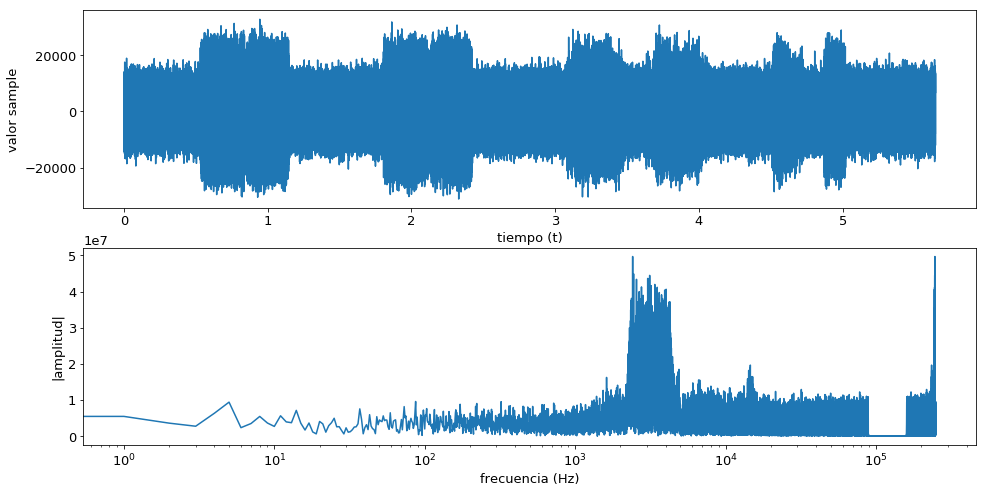

In [37]:
mono = data[0::1]
monot = fft.fft(mono)

figure(figsize=(16,8))
subplot(2,1,1)
pylab.plot(t,mono)
pylab.xlabel("tiempo (t)")
pylab.ylabel("valor sample")
subplot(2,1,2)
pylab.plot(abs(monot))
pylab.xscale('log')
pylab.xlabel("frecuencia (Hz)")
pylab.ylabel("|amplitud|")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


Text(0,0.5,'valor sample')

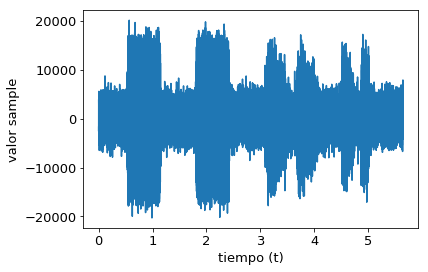

In [38]:
k1 = linspace(0,(n/2-1),n/2)
k2 = linspace((-n/2),-1,n/2)
kcat = np.concatenate((k1,k2))
k = (2*np.pi/(2*L))*kcat
filter = exp(-0.0000003*(k)**2)
monofilt = monot*filter
mononf = fft.ifft(monofilt)

plot(t,real(mononf))
pylab.xlabel("tiempo (t)")
pylab.ylabel("valor sample")

In [35]:
nuevo = mononf.astype(np.int16)
waves.write('fftaltitude.wav',sound[0],nuevo)
ipd.Audio('fftaltitude.wav')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
